<font size=5>DSCI-552 Homework8



#### Name: Boyu Shen
#### Github username: boyushen0701
#### USC ID: 3547352504

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.special import softmax
from sklearn.metrics import confusion_matrix,roc_curve
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
import random

#### 1. Supervised, Semi-Supervised, and Unsupervised Learning


<br>(a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. 
<br>Download the data in https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data,
<br>which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.

In [8]:
data=pd.read_csv('../data/wdbc.data',header=None)
data #take a look at the data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
columns=[]
get_name=False
for line in open('../data/wdbc.names'):
    line=line.strip()
    sp=line.split(' ')
    if 'Attribute' in line:
        get_name=True
    if 'Several' in line:
        get_name=False
    if get_name==True:
        try:
            columns.append(sp[1])
        except:
            None

columns[1]='ID number'
columns[-3]='concave points'
columns[-1]='fractal dimension'
columns.remove('Attribute')
columns.remove('real-valued')
attrs=[]
for j in [1,2,3]:
    for attr in columns[2:]:
        attrs.append(attr+str(j))
names=columns[:2]
names.extend(attrs) # create the column names for the dataframe
data.columns=names
data.replace('M', 1, inplace=True) # mark Malignant as positive class(1)
data.replace('B', 0, inplace=True) # mark Benign as negative class(0)
data

,ID number,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave points3,symmetry3,fractal dimension3
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


(b) Monte-Carlo Simulation: Repeat the following procedures for supervised, un-supervised, and semi-supervised learning M = 30 times, and 
use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the 
average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.

i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use 
normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot 
the ROC and report the confusion matrix for training and testing in one of the runs.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

M=30
Cs=[]
X_set=data.iloc[:,2:]
Y_set=data.iloc[:,1]
log_c=range(-3,5)
train_accuracy=[]
test_accuracy=[]
train_precision=[]
test_precision=[]
train_recall=[]
test_recall=[]
train_f1=[]
test_f1=[]
train_auc=[]
test_auc=[]
for l in log_c:
    Cs.append(10**l)
for i in range(M):
    X_train, X_test, Y_train, Y_test=train_test_split(X_set,Y_set,test_size=0.2,random_state=i,stratify=Y_set) # Monte-Carlo Simulation train test split
    MMS=MinMaxScaler() # normalized data
    MMS.fit(X_train)
    X_train_norm=MMS.transform(X_train)
    X_test_norm=MMS.transform(X_test)
    svc=LinearSVC(random_state=22, penalty='l1',dual=False,max_iter=1000000)
    parameters={'C':Cs}
    kfold=StratifiedKFold(n_splits=5)
    GS1=GridSearchCV(svc, parameters, cv=kfold ,n_jobs=-1).fit(X_train_norm, Y_train)
    c1=GS1.best_params_['C'] # best c from cross validation
    lsvc=LinearSVC(random_state=22, penalty='l1',dual=False,max_iter=1000000,C=c1) # retrain the model on the whole training set
    lsvc.fit(X_train_norm,Y_train)
    train_accuracy.append(lsvc.score(X_train_norm,Y_train))
    test_accuracy.append(lsvc.score(X_test_norm,Y_test))
    train_pred=lsvc.predict(X_train_norm)
    test_pred=lsvc.predict(X_test_norm)
    train_precision.append(precision_score(Y_train,train_pred))
    test_precision.append(precision_score(Y_test,test_pred))
    train_recall.append(recall_score(Y_train,train_pred))
    test_recall.append(recall_score(Y_test,test_pred))
    train_f1.append(f1_score(Y_train,train_pred))
    test_f1.append(f1_score(Y_test,test_pred))
    train_prob=lsvc.decision_function(X_train_norm)
    test_prob=lsvc.decision_function(X_test_norm)
    train_auc.append(roc_auc_score(Y_train,train_prob))
    test_auc.append(roc_auc_score(Y_test,test_prob))
    print('Simulation',i+1,'completed, the best c is',c1)

Simulation 1 completed, the best c is 1
Simulation 2 completed, the best c is 10
Simulation 3 completed, the best c is 1
Simulation 4 completed, the best c is 1
Simulation 5 completed, the best c is 1
Simulation 6 completed, the best c is 1
Simulation 7 completed, the best c is 10
Simulation 8 completed, the best c is 1
Simulation 9 completed, the best c is 1
Simulation 10 completed, the best c is 1
Simulation 11 completed, the best c is 1
Simulation 12 completed, the best c is 1
Simulation 13 completed, the best c is 1
Simulation 14 completed, the best c is 1
Simulation 15 completed, the best c is 10
Simulation 16 completed, the best c is 1
Simulation 17 completed, the best c is 1
Simulation 18 completed, the best c is 10
Simulation 19 completed, the best c is 10
Simulation 20 completed, the best c is 10
Simulation 21 completed, the best c is 1
Simulation 22 completed, the best c is 1
Simulation 23 completed, the best c is 1
Simulation 24 completed, the best c is 10
Simulation 25 comp

In [5]:
avg_train_accuracy=sum(train_accuracy)/len(train_accuracy)
avg_test_accuracy=sum(test_accuracy)/len(test_accuracy)
avg_train_precision=sum(train_precision)/len(train_precision)
avg_test_precision=sum(test_precision)/len(test_precision)
avg_train_recall=sum(train_recall)/len(train_recall)
avg_test_recall=sum(test_recall)/len(test_recall)
avg_train_f1=sum(train_f1)/len(train_f1)
avg_test_f1=sum(test_f1)/len(test_f1)
avg_train_auc=sum(train_auc)/len(train_auc)
avg_test_auc=sum(test_auc)/len(test_auc)
stats=[[avg_train_accuracy,avg_train_precision,avg_train_recall,avg_train_f1,avg_train_auc],[avg_test_accuracy,avg_test_precision,avg_test_recall,avg_test_f1,avg_test_auc]]
report=pd.DataFrame(data=stats,index=['training set','test set'],columns=['accuracy','precision','recall','F1-score','AUC'])
print('The average statistics over 30 simulations:')
report

The average statistics over 30 simulations:


,accuracy,precision,recall,F1-score,AUC
training set,0.984982,0.989023,0.970588,0.979697,0.997510
test set,0.965497,0.971672,0.934127,0.952108,0.992758


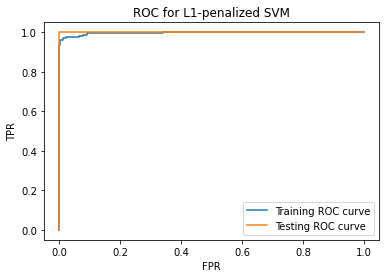

In [8]:
from sklearn.metrics import confusion_matrix,roc_curve
import matplotlib.pyplot as plt

# for the last simulation, report the ROC and the confusion matrix
train_fpr,train_tpr,train_thresholds=roc_curve(Y_train,train_prob)
test_fpr,test_tpr,test_thresholds=roc_curve(Y_test,test_prob)
plt.figure()
plt.plot(train_fpr,train_tpr,label='Training ROC curve')
plt.plot(test_fpr,test_tpr,label='Testing ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC for L1-penalized SVM')
plt.legend(loc="lower right")
plt.show()

In [13]:
train_cfm=confusion_matrix(Y_train,train_pred)
test_cfm=confusion_matrix(Y_test,test_pred)
print('Confusion matrix for training set:')
print(train_cfm)
print('Confusion matrix for testing set:')
print(test_cfm)

Confusion matrix for training set:
[[283   2]
 [  7 163]]
Confusion matrix for testing set:
[[72  0]
 [ 1 41]]


ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as 
labeled data and the rest as unlabelled data. You can select them randomly.
<br>A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.
<br>B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data andthe average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [31]:
train_accuracy=[]
test_accuracy=[]
train_precision=[]
test_precision=[]
train_recall=[]
test_recall=[]
train_f1=[]
test_f1=[]
train_auc=[]
test_auc=[]
for i in range(M):
    X_train, X_test, Y_train, Y_test=train_test_split(X_set,Y_set,test_size=0.2,random_state=i,stratify=Y_set) # Monte-Carlo Simulation train test split
    MMS=MinMaxScaler() # normalized data
    MMS.fit(X_train)
    X_train_norm=MMS.transform(X_train)
    X_test_norm=MMS.transform(X_test)
    X_label, X_unlabel, Y_label, Y_unlabel=train_test_split(X_train_norm,Y_train,test_size=0.5,random_state=i,stratify=Y_train)
    X_label=pd.DataFrame(X_label)
    X_unlabel=pd.DataFrame(X_unlabel)
    svc=LinearSVC(random_state=22, penalty='l1',dual=False,max_iter=1000000)
    parameters={'C':Cs}
    kfold=StratifiedKFold(n_splits=5)
    GS2=GridSearchCV(svc, parameters, cv=kfold ,n_jobs=-1).fit(X_label, Y_label)
    c2=GS2.best_params_['C'] # best c from cross validation
    lsvc=LinearSVC(random_state=22, penalty='l1',dual=False,max_iter=1000000,C=c2)
    lsvc.fit(X_label,Y_label)
    x_train=X_label
    y_train=Y_label
    while len(X_unlabel)>0:
        distances=np.abs(lsvc.decision_function(X_unlabel))
        pos=distances.argmax()
        if lsvc.decision_function(X_unlabel)[pos]<0:
            label=0
        else:
            label=1
        x_train=np.append(x_train,[X_unlabel.iloc[pos]],axis=0)
        y_train=y_train.append(pd.Series(label))
        X_unlabel=X_unlabel.drop(X_unlabel.index[pos]) # remove the farthest unlabeled data
        lsvc.fit(x_train,y_train)
    kfold=StratifiedKFold(n_splits=5)
    GS=GridSearchCV(lsvc, parameters, cv=kfold ,n_jobs=-1).fit(x_train,y_train)
    c=GS.best_params_['C'] # best c from cross validation
    lsvc=LinearSVC(random_state=22, penalty='l1',dual=False,max_iter=1000000,C=c)
    lsvc.fit(x_train,y_train) # retrain the svm
    train_accuracy.append(lsvc.score(X_train_norm,Y_train))
    test_accuracy.append(lsvc.score(X_test_norm,Y_test))
    train_pred=lsvc.predict(X_train_norm)
    test_pred=lsvc.predict(X_test_norm)
    train_precision.append(precision_score(Y_train,train_pred))
    test_precision.append(precision_score(Y_test,test_pred))
    train_recall.append(recall_score(Y_train,train_pred))
    test_recall.append(recall_score(Y_test,test_pred))
    train_f1.append(f1_score(Y_train,train_pred))
    test_f1.append(f1_score(Y_test,test_pred))
    train_prob=lsvc.decision_function(X_train_norm)
    test_prob=lsvc.decision_function(X_test_norm)
    train_auc.append(roc_auc_score(Y_train,train_prob))
    test_auc.append(roc_auc_score(Y_test,test_prob))
    print('Simulation',i+1,'completed, the final best c is',c)
          

Simulation 1 completed, the final best c is 1
Simulation 2 completed, the final best c is 1
Simulation 3 completed, the final best c is 1
Simulation 4 completed, the final best c is 10
Simulation 5 completed, the final best c is 1
Simulation 6 completed, the final best c is 1
Simulation 7 completed, the final best c is 10
Simulation 8 completed, the final best c is 10
Simulation 9 completed, the final best c is 1
Simulation 10 completed, the final best c is 100
Simulation 11 completed, the final best c is 1
Simulation 12 completed, the final best c is 1
Simulation 13 completed, the final best c is 1
Simulation 14 completed, the final best c is 1
Simulation 15 completed, the final best c is 1
Simulation 16 completed, the final best c is 1
Simulation 17 completed, the final best c is 10
Simulation 18 completed, the final best c is 10
Simulation 19 completed, the final best c is 1
Simulation 20 completed, the final best c is 1000
Simulation 21 completed, the final best c is 1
Simulation 2

In [32]:
avg_train_accuracy=sum(train_accuracy)/len(train_accuracy)
avg_test_accuracy=sum(test_accuracy)/len(test_accuracy)
avg_train_precision=sum(train_precision)/len(train_precision)
avg_test_precision=sum(test_precision)/len(test_precision)
avg_train_recall=sum(train_recall)/len(train_recall)
avg_test_recall=sum(test_recall)/len(test_recall)
avg_train_f1=sum(train_f1)/len(train_f1)
avg_test_f1=sum(test_f1)/len(test_f1)
avg_train_auc=sum(train_auc)/len(train_auc)
avg_test_auc=sum(test_auc)/len(test_auc)
stats1=[[avg_train_accuracy,avg_train_precision,avg_train_recall,avg_train_f1,avg_train_auc],[avg_test_accuracy,avg_test_precision,avg_test_recall,avg_test_f1,avg_test_auc]]
report1=pd.DataFrame(data=stats1,index=['training set','test set'],columns=['accuracy','precision','recall','F1-score','AUC'])
print('The average statistics over 30 simulations for Semi-Supervised Learning:')
report1

The average statistics over 30 simulations for Semi-Supervised Learning:


,accuracy,precision,recall,F1-score,AUC
training set,0.976190,0.983433,0.952549,0.967587,0.994125
test set,0.960819,0.970183,0.923016,0.945413,0.991733


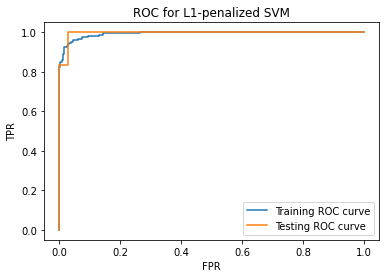

In [33]:
# for the last simulation, report the ROC and the confusion matrix
train_fpr,train_tpr,train_thresholds=roc_curve(Y_train,train_prob)
test_fpr,test_tpr,test_thresholds=roc_curve(Y_test,test_prob)
plt.figure()
plt.plot(train_fpr,train_tpr,label='Training ROC curve')
plt.plot(test_fpr,test_tpr,label='Testing ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC for L1-penalized SVM')
plt.legend(loc="lower right")
plt.show()

In [34]:
train_cfm=confusion_matrix(Y_train,train_pred)
test_cfm=confusion_matrix(Y_test,test_pred)
print('Confusion matrix for training set:')
print(train_cfm)
print('Confusion matrix for testing set:')
print(test_cfm)

Confusion matrix for training set:
[[276   9]
 [ 10 160]]
Confusion matrix for testing set:
[[70  2]
 [ 2 40]]


iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.
<br>A. Run the k-means algorithm multiple times. Make sure that you initialize the algorithm randomly. How do you make sure that the algorithm 
was not trapped in a local minimum?
<br>B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.
<br>C. Classify test data based on their proximity to the centers of the clusters.
Report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the
test data.

We need to debug the n_init parameter larger in KMeans algorithm so that the best cluster result will be selected from various intial 
situations. Hence, we can avoid being trapped in a local minimum.

In [131]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.special import softmax

train_accuracy=[]
test_accuracy=[]
train_precision=[]
test_precision=[]
train_recall=[]
test_recall=[]
train_f1=[]
test_f1=[]
train_auc=[]
test_auc=[]
for i in range(M):
    X_train, X_test, Y_train, Y_test=train_test_split(X_set,Y_set,test_size=0.2,random_state=i,stratify=Y_set) # Monte-Carlo Simulation train test split
    cluster=KMeans(random_state=22,n_clusters=2,n_init=50)
    cluster.fit(X_train)
    labels=cluster.labels_
    centers=cluster.cluster_centers_
    index_0=np.where(labels==0)
    index_1=np.where(labels==1)
    cluster_0=X_train.iloc[index_0]
    cluster_1=X_train.iloc[index_1]
    distances0={}
    distances1={}
    order0=[]
    order1=[]
    for k in range(len(cluster_0)):
        distances0[index_0[0][k]]=np.linalg.norm(cluster_0.iloc[k]-centers[0]) # key is the order in X_train, value is the distance
    for l in range(len(cluster_1)):
        distances1[index_1[0][l]]=np.linalg.norm(cluster_1.iloc[l]-centers[1])
    s1=sorted([(v1,k1) for k1,v1 in distances0.items()],reverse=False)
    s2=sorted([(v2,k2) for k2,v2 in distances1.items()],reverse=False)
    for m in range(30):
        order0.append(s1[m][1]) # the orders in X_train of the 30 cloest points
        order1.append(s2[m][1])
    labels0=[]
    labels1=[]
    for p in order0:
        labels0.append(list(Y_train)[p])
    for q in order1:
        labels1.append(list(Y_train)[q])
    if labels0.count(0)>labels0.count(1):
        label0=0
    else:
        label0=1
    if labels1.count(0)>labels1.count(1):
        label1=0
    else:
        label1=1
    train_pred=[]
    test_pred=[]
    for t in range(len(Y_train)):
        if t in index_0[0]:
            train_pred.append(label0)
        else:
            train_pred.append(label1)
    for s in range(len(Y_test)): # Classify test data based on their proximity to the centers of the clusters
        if np.linalg.norm(X_test.iloc[s]-centers[0])<np.linalg.norm(X_test.iloc[s]-centers[1]): 
            test_pred.append(label0)
        else:
            test_pred.append(label1)
    distances_train=[]
    distances_test=[]
    for u in range(len(X_train)):
        distances_train.append([-np.linalg.norm(X_train.iloc[u]-centers[0]),-np.linalg.norm(X_train.iloc[u]-centers[1])])
    for v in range(len(X_test)):
        distances_test.append([-np.linalg.norm(X_test.iloc[v]-centers[0]),-np.linalg.norm(X_test.iloc[v]-centers[1])])
    train_prob=softmax(distances_train,axis=1)[:,label1] # use softmax to calculate probabilities
    test_prob=softmax(distances_test,axis=1)[:,label1] # if label0 is 0, probability of class1 is in proportion to distance(negative) to center of cluster 1
    train_accuracy.append(accuracy_score(Y_train,train_pred))
    test_accuracy.append(accuracy_score(Y_test,test_pred))
    train_precision.append(precision_score(Y_train,train_pred))
    test_precision.append(precision_score(Y_test,test_pred))
    train_recall.append(recall_score(Y_train,train_pred))
    test_recall.append(recall_score(Y_test,test_pred))
    train_f1.append(f1_score(Y_train,train_pred))
    test_f1.append(f1_score(Y_test,test_pred))
    train_auc.append(roc_auc_score(Y_train,train_prob))
    test_auc.append(roc_auc_score(Y_test,test_prob))
    print('Simulation',i+1,'completed')
    

Simulation 1 completed
Simulation 2 completed
Simulation 3 completed
Simulation 4 completed
Simulation 5 completed
Simulation 6 completed
Simulation 7 completed
Simulation 8 completed
Simulation 9 completed
Simulation 10 completed
Simulation 11 completed
Simulation 12 completed
Simulation 13 completed
Simulation 14 completed
Simulation 15 completed
Simulation 16 completed
Simulation 17 completed
Simulation 18 completed
Simulation 19 completed
Simulation 20 completed
Simulation 21 completed
Simulation 22 completed
Simulation 23 completed
Simulation 24 completed
Simulation 25 completed
Simulation 26 completed
Simulation 27 completed
Simulation 28 completed
Simulation 29 completed
Simulation 30 completed


In [132]:
avg_train_accuracy=sum(train_accuracy)/len(train_accuracy)
avg_test_accuracy=sum(test_accuracy)/len(test_accuracy)
avg_train_precision=sum(train_precision)/len(train_precision)
avg_test_precision=sum(test_precision)/len(test_precision)
avg_train_recall=sum(train_recall)/len(train_recall)
avg_test_recall=sum(test_recall)/len(test_recall)
avg_train_f1=sum(train_f1)/len(train_f1)
avg_test_f1=sum(test_f1)/len(test_f1)
avg_train_auc=sum(train_auc)/len(train_auc)
avg_test_auc=sum(test_auc)/len(test_auc)
stats2=[[avg_train_accuracy,avg_train_precision,avg_train_recall,avg_train_f1,avg_train_auc],[avg_test_accuracy,avg_test_precision,avg_test_recall,avg_test_f1,avg_test_auc]]
report2=pd.DataFrame(data=stats2,index=['training set','test set'],columns=['accuracy','precision','recall','F1-score','AUC'])
print('The average statistics over 30 simulations for Unsupervised Learning:')
report2

The average statistics over 30 simulations for Unsupervised Learning:


,accuracy,precision,recall,F1-score,AUC
training set,0.849817,0.991316,0.603333,0.749817,0.900263
test set,0.854094,0.996235,0.606349,0.752364,0.902397


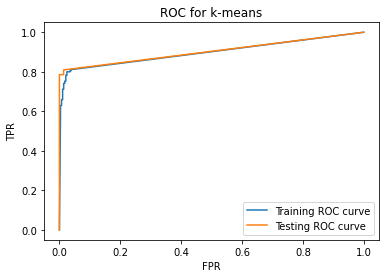

In [133]:
# for the last simulation, report the ROC and the confusion matrix
train_fpr,train_tpr,train_thresholds=roc_curve(Y_train,train_prob)
test_fpr,test_tpr,test_thresholds=roc_curve(Y_test,test_prob)
plt.figure()
plt.plot(train_fpr,train_tpr,label='Training ROC curve')
plt.plot(test_fpr,test_tpr,label='Testing ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC for k-means')
plt.legend(loc="lower right")
plt.show()

In [134]:
train_cfm=confusion_matrix(Y_train,train_pred)
test_cfm=confusion_matrix(Y_test,test_pred)
print('Confusion matrix for training set:')
print(train_cfm)
print('Confusion matrix for testing set:')
print(test_cfm)

Confusion matrix for training set:
[[284   1]
 [ 71  99]]
Confusion matrix for testing set:
[[72  0]
 [12 30]]


iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels. Research what spectral clustering is.
Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive 
class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity 
to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit - predict method.

In multivariate statistics, spectral clustering techniques make use of the spectrum (eigenvalues) of the similarity matrix of the data to perform dimensionality reduction before clustering in fewer dimensions. The similarity matrix is provided as an input and consists of a quantitative assessment of the relative similarity of each pair of points in the dataset.
Cited from: https://en.wikipedia.org/wiki/Spectral_clustering

In [22]:
from sklearn.cluster import SpectralClustering

M=30
X_set=data.iloc[:,2:]
Y_set=data.iloc[:,1]
train_accuracy=[]
test_accuracy=[]
train_precision=[]
test_precision=[]
train_recall=[]
test_recall=[]
train_f1=[]
test_f1=[]
train_auc=[]
test_auc=[]
for i in range(M):
    X_train, X_test, Y_train, Y_test=train_test_split(X_set,Y_set,test_size=0.2,random_state=i,stratify=Y_set) # Monte-Carlo Simulation train test split
    MMS=MinMaxScaler() # normalized data
    MMS.fit(X_train)
    X_train_norm=MMS.transform(X_train)
    X_test_norm=MMS.transform(X_test)
    spclusters=SpectralClustering(n_clusters=2,random_state=22,gamma=1,affinity='rbf')
    # for training set
    cluster_result_train=spclusters.fit_predict(X_train_norm)
    index_0_train=[]
    index_1_train=[]
    for j in range(len(cluster_result_train)):
        if cluster_result_train[j]==0:
            index_0_train.append(j)
        else:
            index_1_train.append(j)
    labels0_train=[]
    labels1_train=[]
    for p in index_0_train:
        labels0_train.append(list(Y_train)[p])
    for q in index_1_train:
        labels1_train.append(list(Y_train)[q])
    if labels0_train.count(0)>labels0_train.count(1):
        label0_train=0
    else:
        label0_train=1
    if labels1_train.count(0)>labels1_train.count(1):
        label1_train=0
    else:
        label1_train=1
    train_pred=[]
    for t in range(len(Y_train)):
        if t in index_0_train:
            train_pred.append(label0_train)
        else:
            train_pred.append(label1_train)
    # for test set
    cluster_result_test=spclusters.fit_predict(X_test_norm)
    index_0_test=[]
    index_1_test=[]
    for k in range(len(cluster_result_test)):
        if cluster_result_test[k]==0:
            index_0_test.append(k)
        else:
            index_1_test.append(k)
    labels0_test=[]
    labels1_test=[]
    for p in index_0_test:
        labels0_test.append(list(Y_test)[p])
    for q in index_1_test:
        labels1_test.append(list(Y_test)[q])
    if labels0_test.count(0)>labels0_test.count(1):
        label0_test=0
    else:
        label0_test=1
    if labels1_test.count(0)>labels1_test.count(1):
        label1_test=0
    else:
        label1_test=1
    test_pred=[]
    for z in range(len(Y_test)):
        if z in index_0_test:
            test_pred.append(label0_test)
        else:
            test_pred.append(label1_test)
    train_accuracy.append(accuracy_score(Y_train,train_pred))
    test_accuracy.append(accuracy_score(Y_test,test_pred))
    train_precision.append(precision_score(Y_train,train_pred))
    test_precision.append(precision_score(Y_test,test_pred))
    train_recall.append(recall_score(Y_train,train_pred))
    test_recall.append(recall_score(Y_test,test_pred))
    train_f1.append(f1_score(Y_train,train_pred))
    test_f1.append(f1_score(Y_test,test_pred))
    train_auc.append(roc_auc_score(Y_train,train_pred))
    test_auc.append(roc_auc_score(Y_test,test_pred))
    print('Simulation',i+1,'completed')

Simulation 1 completed
Simulation 2 completed
Simulation 3 completed
Simulation 4 completed
Simulation 5 completed
Simulation 6 completed
Simulation 7 completed
Simulation 8 completed
Simulation 9 completed
Simulation 10 completed
Simulation 11 completed
Simulation 12 completed
Simulation 13 completed
Simulation 14 completed
Simulation 15 completed
Simulation 16 completed
Simulation 17 completed
Simulation 18 completed
Simulation 19 completed
Simulation 20 completed
Simulation 21 completed
Simulation 22 completed
Simulation 23 completed
Simulation 24 completed
Simulation 25 completed
Simulation 26 completed
Simulation 27 completed
Simulation 28 completed
Simulation 29 completed
Simulation 30 completed


In [23]:
avg_train_accuracy=sum(train_accuracy)/len(train_accuracy)
avg_test_accuracy=sum(test_accuracy)/len(test_accuracy)
avg_train_precision=sum(train_precision)/len(train_precision)
avg_test_precision=sum(test_precision)/len(test_precision)
avg_train_recall=sum(train_recall)/len(train_recall)
avg_test_recall=sum(test_recall)/len(test_recall)
avg_train_f1=sum(train_f1)/len(train_f1)
avg_test_f1=sum(test_f1)/len(test_f1)
avg_train_auc=sum(train_auc)/len(train_auc)
avg_test_auc=sum(test_auc)/len(test_auc)
stats3=[[avg_train_accuracy,avg_train_precision,avg_train_recall,avg_train_f1,avg_train_auc],[avg_test_accuracy,avg_test_precision,avg_test_recall,avg_test_f1,avg_test_auc]]
report3=pd.DataFrame(data=stats3,index=['training set','test set'],columns=['accuracy','precision','recall','F1-score','AUC'])
print('The average statistics over 30 simulations for Spectral Clustering:')
report3

The average statistics over 30 simulations for Spectral Clustering:


,accuracy,precision,recall,F1-score,AUC
training set,0.862344,0.980199,0.644706,0.776668,0.818435
test set,0.854386,0.988086,0.614286,0.741529,0.804365


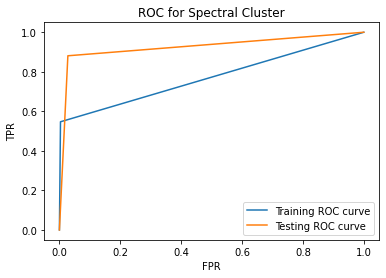

In [26]:
# for the last simulation, report the ROC and the confusion matrix
train_fpr,train_tpr,train_thresholds=roc_curve(Y_train,train_pred)
test_fpr,test_tpr,test_thresholds=roc_curve(Y_test,test_pred)
plt.figure()
plt.plot(train_fpr,train_tpr,label='Training ROC curve')
plt.plot(test_fpr,test_tpr,label='Testing ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC for Spectral Cluster')
plt.legend(loc="lower right")
plt.show()

train_cfm=confusion_matrix(Y_train,train_pred)
test_cfm=confusion_matrix(Y_test,test_pred)
print('Confusion matrix for training set:')
print(train_cfm)
print('Confusion matrix for testing set:')
print(test_cfm)

v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled. 
One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

According to the statistics after each learning method, it is obvious that supervised learning performs better than semi-supervised learning, 
but the gap is slight. Both supervised learning and semi-supervised learning performs way better than any one of the 2 unsupervised learning 
methods in spite of the similar performance on precision. Besides, each one has its own advantages between 2 unsupervised learning methods, 
k-means performs better based on precision and AUC, Spectral Clustering performs better based on accuracy and recall.

#### 2. Active Learning Using Support Vector Machines


<br>(a) Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. 
Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [33]:
data2=pd.read_csv('../data/data_banknote_authentication.txt',header=None)
columns2=['variance','skewness','curtosis','entropy','class']
data2.columns=columns2
data2

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [36]:
x_set=data2.iloc[:,:4]
y_set=data2.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x_set,y_set,test_size=472/(900+472),random_state=55,stratify=y_set)
x_train

,variance,skewness,curtosis,entropy
1018,-0.40804,0.54214,-0.52725,0.65860
454,1.60200,6.12510,0.52924,0.47886
704,3.70220,6.99420,-1.85110,-0.12889
846,-2.14050,-0.16762,1.32100,-0.20906
503,4.92940,0.27727,0.20792,0.33662
...,...,...,...,...
1085,-2.66490,-12.81300,12.66890,-1.90820
95,-0.64472,-4.60620,8.34700,-2.70990
683,4.33650,-3.58400,3.68840,0.74912
372,0.74307,11.17000,-1.38240,-4.07280


(b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.
<br>i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the 
penalty parameter using 5-fold cross validation. Repeat this process by adding 10 other randomly selected data points to the pool, until you 
use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will 
have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [95]:
import random

def select_data():
    IDs=[]
    ranges=list(range(900))
    ID0=random.sample(ranges,10)
    sum0=sum(y_train.iloc[ID0])
    while sum0<2 or sum0>9: # ensure both classes have at least 2 candidates in the first step
        ID0=random.sample(ranges,10)
        sum0=sum(y_train.iloc[ID0])
    IDs.append(ID0)
    for k in ID0:
        ranges.remove(k)
    while len(ranges)>0:
        ID=random.sample(ranges,10)
        IDs.append(ID)
        for j in ID:
            ranges.remove(j)
    return IDs

In [96]:
Cs=[]
log_c=range(-3,5)
for l in log_c:
    Cs.append(10**l)
Error1=[]
for i in range(50):
    IDs=select_data()
    errors=[]
    x_training=pd.DataFrame()
    y_training=[]
    for j in range(90):
        x_training=x_training.append(x_train.iloc[IDs[j]])
        for k in IDs[j]:
            y_training.append(y_train.iloc[k])
        parameters={'C': Cs}
        svc=LinearSVC(random_state=22,penalty='l1',dual=False,max_iter=1000000)
        GS=GridSearchCV(svc,parameters,cv=5,n_jobs=-1).fit(x_training,y_training)
        c=GS.best_params_['C'] # best c from cross validation
        lsvc=LinearSVC(random_state=22, penalty='l1',dual=False,C=c,max_iter=1000000) 
        lsvc.fit(x_training,y_training)
        errors.append(1-lsvc.score(x_test,y_test))
    Error1.append(errors)
    print('i=',i,'completed')

E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 0 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


i= 1 completed
i= 2 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 3 completed
i= 4 completed
i= 5 completed
i= 6 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


i= 7 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 8 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 9 completed
i= 10 completed
i= 11 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


i= 12 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


i= 13 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 14 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 15 completed
i= 16 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 17 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


i= 18 completed
i= 19 completed
i= 20 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 21 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


i= 22 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 23 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 24 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


i= 25 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


i= 26 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


i= 27 completed
i= 28 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


i= 29 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


i= 30 completed
i= 31 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


i= 32 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 33 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


i= 34 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


i= 35 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 36 completed
i= 37 completed
i= 38 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 39 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 40 completed
i= 41 completed
i= 42 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 43 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


i= 44 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
8 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\usc\anaconda\lib\site-packages\sklearn\svm\_classes.py", line 257, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_libline

i= 45 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 46 completed
i= 47 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 48 completed
i= 49 completed


In [97]:
pd.DataFrame(Error1)

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.173729,0.036017,0.031780,0.029661,0.010593,0.010593,0.019068,0.010593,0.016949,0.008475,...,0.014831,0.014831,0.014831,0.014831,0.014831,0.016949,0.016949,0.014831,0.016949,0.016949
1,0.298729,0.048729,0.010593,0.012712,0.014831,0.014831,0.014831,0.016949,0.016949,0.008475,...,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949
2,0.175847,0.139831,0.033898,0.029661,0.021186,0.012712,0.012712,0.010593,0.010593,0.010593,...,0.014831,0.014831,0.016949,0.016949,0.016949,0.014831,0.014831,0.016949,0.016949,0.016949
3,0.095339,0.029661,0.048729,0.027542,0.014831,0.016949,0.042373,0.016949,0.038136,0.021186,...,0.014831,0.014831,0.014831,0.014831,0.014831,0.016949,0.016949,0.016949,0.016949,0.016949
4,0.184322,0.078390,0.078390,0.072034,0.069915,0.016949,0.019068,0.021186,0.016949,0.016949,...,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949
5,0.105932,0.012712,0.016949,0.019068,0.023305,0.027542,0.027542,0.029661,0.029661,0.050847,...,0.012712,0.019068,0.019068,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949
6,0.052966,0.069915,0.069915,0.069915,0.027542,0.027542,0.023305,0.023305,0.025424,0.023305,...,0.014831,0.014831,0.014831,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949
7,0.103814,0.031780,0.031780,0.029661,0.019068,0.012712,0.029661,0.012712,0.014831,0.014831,...,0.019068,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949
8,0.074153,0.086864,0.059322,0.010593,0.019068,0.016949,0.025424,0.021186,0.029661,0.029661,...,0.016949,0.021186,0.021186,0.016949,0.016949,0.016949,0.021186,0.016949,0.016949,0.016949
9,0.029661,0.044492,0.019068,0.010593,0.010593,0.016949,0.012712,0.012712,0.019068,0.016949,...,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949


ii. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the 
parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM and 
add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all 
training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have 
implemented active learning.

In [108]:
def initial_data():
    ranges=list(range(900))
    ID0=random.sample(ranges,10)
    sum0=sum(y_train.iloc[ID0])
    while sum0<2 or sum0>9: # ensure both classes have at least 2 candidates in the first step
        ID0=random.sample(ranges,10)
        sum0=sum(y_train.iloc[ID0])
    return ID0

In [127]:
Error2=[]
for i in range(50):
    ID0=initial_data()
    x_training=x_train.iloc[ID0]
    y_training=y_train.iloc[ID0]       
    x_remain=x_train.drop(x_train.index[ID0])
    y_remain=y_train.drop(y_train.index[ID0])
    x_training=x_training.reset_index(drop=True)
    y_training=y_training.reset_index(drop=True)
    x_remain=x_remain.reset_index(drop=True)
    y_remain=y_remain.reset_index(drop=True)
    errors = list()
    for j in range(90):
        parameters = {'C':Cs}
        svc=LinearSVC(random_state=22,penalty='l1',dual=False,max_iter=1000000)
        GS=GridSearchCV(svc,parameters,cv=5,n_jobs=-1).fit(x_training,y_training)
        c=GS.best_params_['C'] # best c from cross validation
        lsvc=LinearSVC(random_state=22, penalty='l1',dual=False,C=c,max_iter=1000000) 
        lsvc.fit(x_training,y_training)
        errors.append(1-lsvc.score(x_test,y_test))
        if j<89:
            distances=lsvc.decision_function(x_remain)
            ID=np.argsort(abs(distances))[:10] # 10 closest data points in the remaining set
            x_training=pd.concat([x_training,x_remain.iloc[ID]],axis=0,ignore_index=True)
            y_training=pd.concat([y_training,y_remain.iloc[ID]],axis=0,ignore_index=True)
            x_remain=x_remain.drop(x_remain.index[ID])
            y_remain=y_remain.drop(y_remain.index[ID])
            x_remain=x_remain.reset_index(drop=True)
            y_remain=y_remain.reset_index(drop=True)
    Error2.append(errors)
    print('i=',i,'completed')

i= 0 completed
i= 1 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 2 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 3 completed
i= 4 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


i= 5 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 6 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


i= 7 completed
i= 8 completed
i= 9 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


i= 10 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


i= 11 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


i= 12 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 13 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 14 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 15 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


i= 16 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


i= 17 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


i= 18 completed
i= 19 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 20 completed
i= 21 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 22 completed
i= 23 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


i= 24 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 25 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 26 completed
i= 27 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 28 completed
i= 29 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


i= 30 completed
i= 31 completed
i= 32 completed
i= 33 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 34 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 35 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


i= 36 completed
i= 37 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


i= 38 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 39 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 40 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 41 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 42 completed
i= 43 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 44 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


i= 45 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


i= 46 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 47 completed
i= 48 completed


E:\usc\anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


i= 49 completed


In [129]:
pd.DataFrame(Error2)

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.139831,0.044492,0.023305,0.014831,0.036017,0.021186,0.016949,0.016949,0.016949,0.016949,...,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.010593,0.014831,0.014831,0.014831
1,0.158898,0.025424,0.006356,0.014831,0.004237,0.012712,0.014831,0.016949,0.016949,0.016949,...,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831
2,0.082627,0.074153,0.052966,0.027542,0.027542,0.027542,0.027542,0.014831,0.016949,0.016949,...,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831
3,0.091102,0.044492,0.023305,0.012712,0.019068,0.014831,0.021186,0.014831,0.016949,0.010593,...,0.016949,0.016949,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831
4,0.033898,0.025424,0.012712,0.004237,0.006356,0.019068,0.016949,0.016949,0.016949,0.014831,...,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831
5,0.139831,0.029661,0.019068,0.040254,0.019068,0.019068,0.016949,0.016949,0.016949,0.016949,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
6,0.050847,0.027542,0.014831,0.084746,0.004237,0.006356,0.016949,0.016949,0.016949,0.016949,...,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831
7,0.175847,0.021186,0.023305,0.010593,0.069915,0.021186,0.021186,0.016949,0.016949,0.016949,...,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831
8,0.080508,0.031780,0.033898,0.021186,0.019068,0.016949,0.014831,0.016949,0.016949,0.016949,...,0.010593,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831
9,0.078390,0.076271,0.027542,0.010593,0.012712,0.008475,0.021186,0.019068,0.016949,0.016949,...,0.016949,0.016949,0.016949,0.016949,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593


(c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte 
Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and 
report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

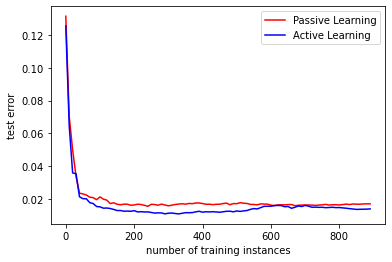

In [133]:
plt.plot(range(0,900,10), pd.DataFrame(Error1).mean(), c='r', label='Passive Learning')
plt.plot(range(0,900,10), pd.DataFrame(Error2).mean(), c='b', label='Active Learning')
plt.xlabel('number of training instances')
plt.ylabel('test error')
plt.legend()
plt.show()

Conclusion: It is obvious that the test error of active learning decreases much faster and achieves a lower level than the test error 
of passive learning as the number of training instances increases.